#### 시계열 회귀분석 (원인분석)

** 앞으로 할 것   
1. 레이블 매핑  
2. 다변량이 잘나와야 원인 분석  

정확도 계산, 파라미터 튜닝, + 역률 돌려보기 + 원인 분석!  

In [89]:
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import tensorflow as tf
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [90]:
import matplotlib.font_manager as fm 

font_fname = 'C:/Windows/Fonts/Malgun.ttf' #적용할 폰트
font_family = fm.FontProperties(fname=font_fname).get_name() #폰트 설정
plt.rcParams["font.family"] = font_family  #폰트 적용

In [91]:
# 부호 오류 고치기 코드
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [92]:
import warnings
warnings.filterwarnings(action='ignore')

In [93]:
os.chdir(r"C:\Users\82109\project\2021 빅데이터 경진대회\최종")

In [95]:
comp_1_one=pd.read_csv('KBV공작_concattt.csv')

TRAIN_SPLIT = 53280

In [96]:
comp_1_one.drop('Unnamed: 0', axis=1, inplace=True)

In [97]:
comp_1_one['TIMESTAMP'] = pd.to_datetime(comp_1_one['TIME'])
comp_1_one.drop('TIME', axis = 1, inplace=True)
comp_1_one.set_index('TIMESTAMP', inplace=True)

In [98]:
comp_1_one

,전류평균,온도,선간전압평균,상전압평균,유효전력평균,누적전력량,역률평균,주파수,전압고조파평균,무효전력평균
TIMESTAMP,,,,,,,,,,
2020-09-16 00:00:00,9.688000,26.875,218.667000,126.167000,1936.25,615574.000,0.526000,59.901000,5.664000,3121.25
2020-09-16 00:01:00,9.667000,26.250,218.000000,125.833000,1940.75,615607.000,0.529000,59.882000,5.697000,3107.50
2020-09-16 00:02:00,9.719000,26.250,218.000000,125.750000,1921.75,615640.000,0.526000,59.873000,5.599000,3098.25
2020-09-16 00:03:00,9.615000,26.250,218.417000,126.000000,1935.50,615673.000,0.527000,59.826000,5.371000,3116.50
2020-09-16 00:04:00,9.677000,26.875,218.333000,125.833000,1932.50,615706.000,0.527000,59.863000,5.404000,3106.25
...,...,...,...,...,...,...,...,...,...,...
2020-10-27 23:55:19,18.208334,16.875,217.916672,125.916664,4332.00,275498.531,0.629468,59.835430,7.421875,5347.50
2020-10-27 23:56:19,18.958334,17.500,218.750000,126.333336,4532.50,275571.500,0.631817,59.835415,7.454427,5560.50
2020-10-27 23:57:19,18.031250,17.500,218.916672,126.416664,4193.00,275644.100,0.614615,59.854070,7.031250,5381.50


In [99]:
DATE = comp_1_one.index

In [100]:
comp_1_one = comp_1_one.values
comp_1_one_mean = comp_1_one[:TRAIN_SPLIT].mean(axis=0)
comp_1_one_std = comp_1_one[:TRAIN_SPLIT].std(axis=0)
comp_1_one = (comp_1_one-comp_1_one_mean)/comp_1_one_std
print(comp_1_one)

[[ 0.94703415  1.01834214  1.25155054 ...  1.0668552   1.51566082
   1.20362722]
 [ 0.94291082  0.87078141  0.7289848  ...  0.46961904  1.54057424
   1.19428622]
 [ 0.95312096  0.87078141  0.7289848  ...  0.18671771  1.46658892
   1.18800227]
 ...
 [ 2.58522144 -1.19506882  1.44715779 ... -0.40831811  2.54786936
   2.73911905]
 [ 2.66294298 -1.34262955  2.49176279 ... -0.11457222  2.35126694
   2.81282809]
 [ 2.54022497 -1.34262955  2.49176279 ... -0.7015925   2.37584215
   2.76323583]]


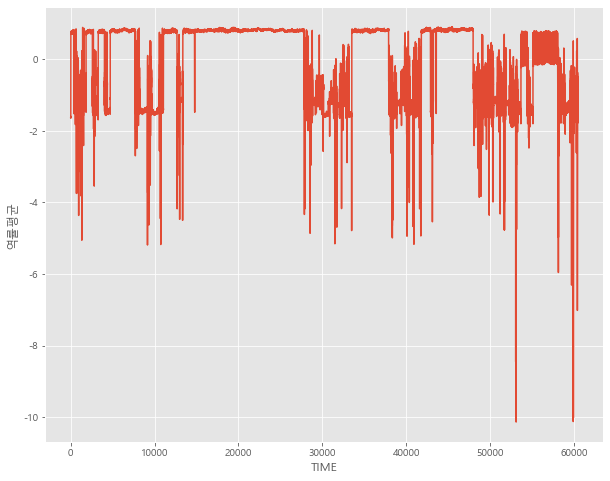

In [101]:
## 역률평균 시계열 그래프 시각화

plt.figure(figsize=(10,8))
plt.plot(comp_1_one[:,6])
plt.xlabel('TIME')
plt.ylabel('역률평균')
plt.show()

<Figure size 432x288 with 0 Axes>

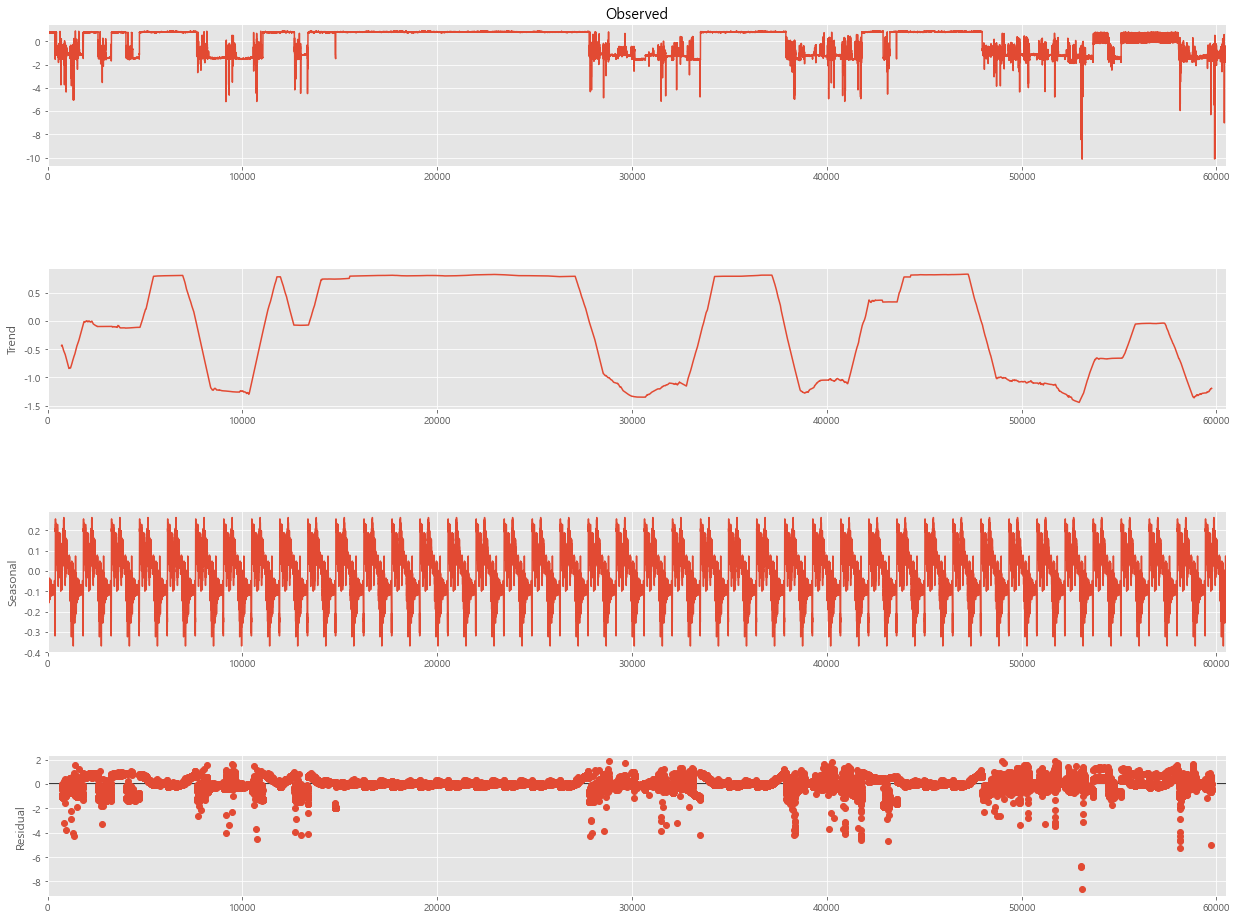

In [102]:
#시계열 분해법으로 분해하기

from statsmodels.tsa.seasonal import seasonal_decompose

result=seasonal_decompose(comp_1_one[:,6],model='additive',freq=1440)
## freq에 들어가는 주기 : 계절성 주기를 기반으로 설정(눈으로 보고 파악해야함)

fig=plt.figure()
fig=result.plot()
fig.set_size_inches(20,15)

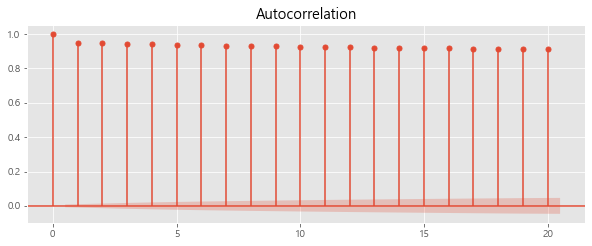

In [103]:
## 데이터가 패턴이 보인다면? -> 정상성이 의심됨 -> 판단하기 위한 ACF 그래프 시각화
import statsmodels.api as sm

fig=plt.figure(figsize=(10,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(comp_1_one[:,6],lags=20,ax=ax1)

## 값이 아주 천천히 작아짐 -> ACF값이 천천히 감소하는 것은 정상성을 만족하지 않는다는 것을 의미

In [104]:
### ADF 검정(Augmented Dickey-Fuller test) / 단위근 검정 으로 정상성 확인
# H0(귀무가설) : 자료에 단위근이 존재한다. 즉, 정상성을 만족하지 않는다.
# H1(대립가설) : 자료가 정상성을 만족한다.

from statsmodels.tsa.stattools import adfuller

result=adfuller(comp_1_one[:,6])
print('ADF Statistic : %f ' % result[0])
print('p-value : %f' % result[1])
print('Critical Values:')

for key,value in result[4].items():
    print('\t%s : %.3f' % (key,value))

ADF Statistic : -5.525681 
p-value : 0.000002
Critical Values:
	1% : -3.430
	5% : -2.862
	10% : -2.567


p-value가 0.05를 넘지 않으므로, 귀무가설을 기각한다!    
-> 즉, 해당 데이터는 정상성을 만족한다!  

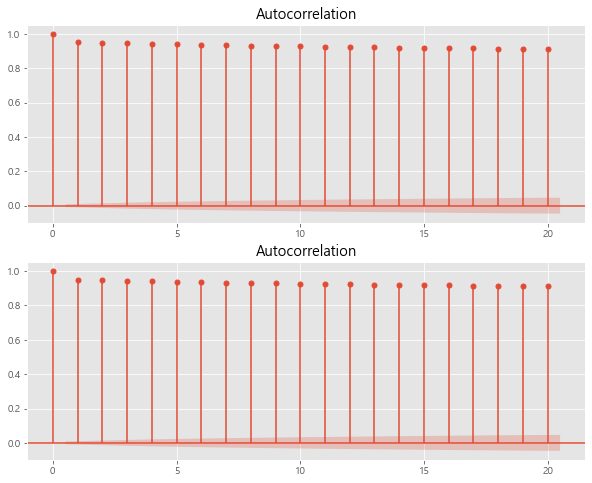

In [105]:
## 정상성을 만족하는 데이터도 ACF와 PACF 그래프를 그려 ARIMA 모형의 p와 q를 결정

import statsmodels.api as sm

fig=plt.figure(figsize=(10,8))

ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(comp_1_one[:,6],lags=20,ax=ax1)

ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_acf(comp_1_one[:,6],lags=20,ax=ax2)

In [106]:
comp_1_one = pd.DataFrame(comp_1_one)

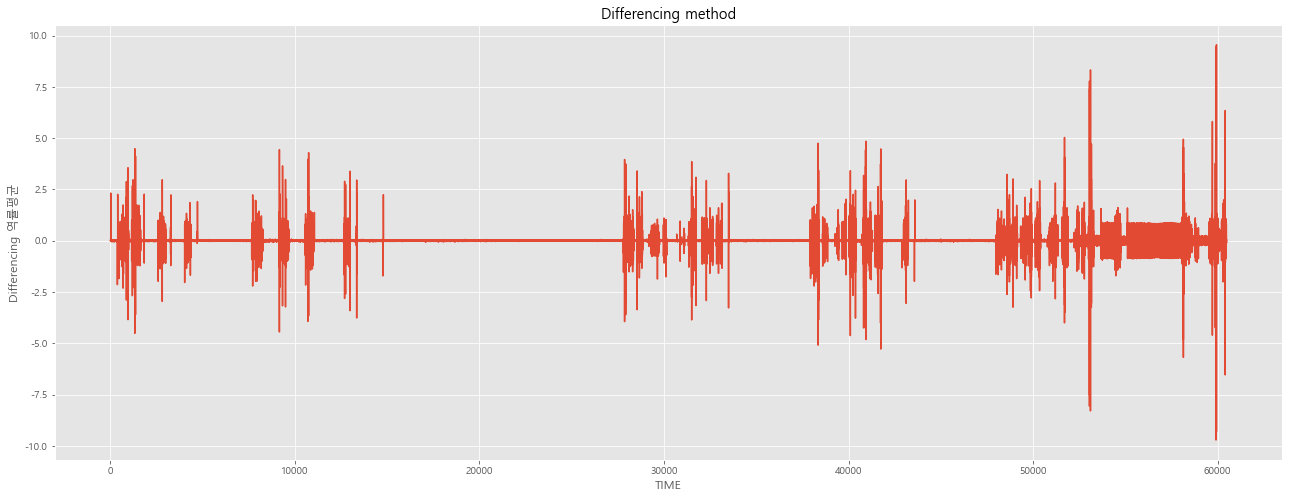

In [107]:
## 정상성을 해결하기 위한 1차 차분

ts_diff= comp_1_one[6]-comp_1_one[6].shift()
plt.figure(figsize=(22,8))
plt.plot(ts_diff)
plt.title('Differencing method')
plt.xlabel('TIME')
plt.ylabel('Differencing 역률평균')
plt.show()

########################################
# seasonal_lag = 6

# for i in X_train_scaling.columns[1:]:
#     X_train_scaling[i]=X_train_scaling[i].diff(seasonal_lag).dropna()
    
# for i in X_test_scaling.columns[1:]:
#     X_test_scaling[i]=X_test_scaling[i].diff(seasonal_lag).dropna()

In [108]:
### ADF 검정(Augmented Dickey-Fuller test) / 단위근 검정 으로 정상성 확인

from statsmodels.tsa.stattools import adfuller

result=adfuller(ts_diff[1:])
print('ADF Statistic : %f ' % result[0])
print('p-value : %f' % result[1])
print('Critical Values:')

for key,value in result[4].items():
    print('\t%s : %.3f' % (key,value))

ADF Statistic : -39.785249 
p-value : 0.000000
Critical Values:
	1% : -3.430
	5% : -2.862
	10% : -2.567


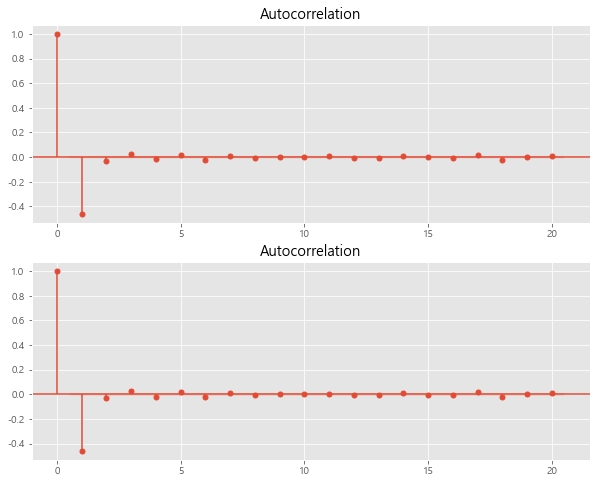

In [109]:
## 정상성을 만족하는 데이터도 ACF와 PACF 그래프를 그려 ARIMA 모형의 p와 q를 결정

import statsmodels.api as sm

fig=plt.figure(figsize=(10,8))

ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(ts_diff[1:],lags=20,ax=ax1)

ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_acf(ts_diff[1:],lags=20,ax=ax2)

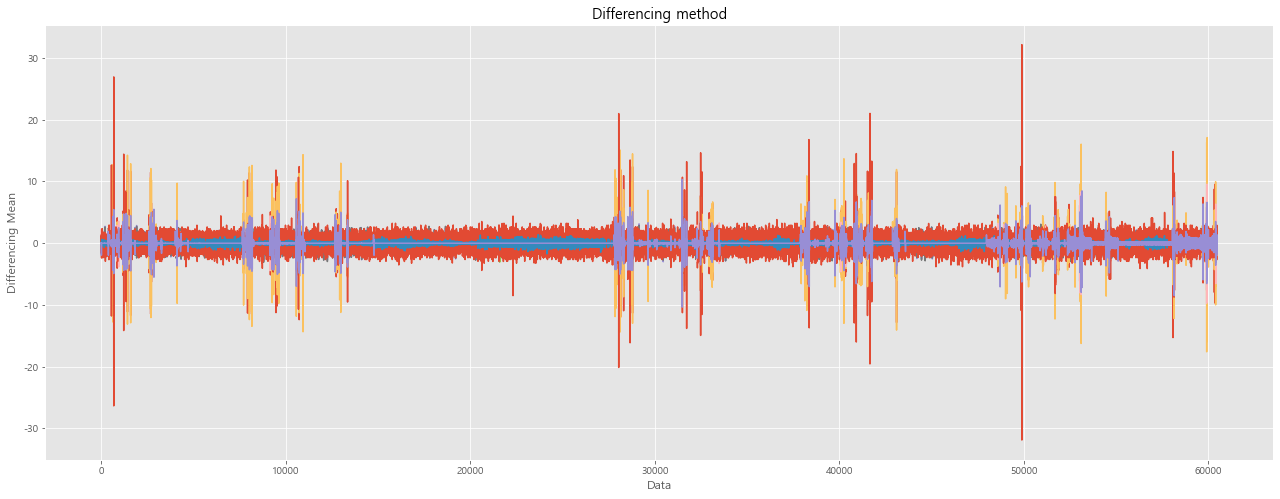

In [110]:
comp_diff = comp_1_one - comp_1_one.shift()
plt.figure(figsize = (22, 8))
plt.plot(comp_diff)
plt.title('Differencing method')
plt.xlabel('Data')
plt.ylabel('Differencing Mean')
plt.show()

In [111]:
comp_1_one = comp_diff.values

In [112]:
comp_1_one

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [-0.00412333, -0.14756073, -0.52256574, ..., -0.59723616,
         0.02491343, -0.00934101],
       [ 0.01021014,  0.        ,  0.        , ..., -0.28290134,
        -0.07398533, -0.00628395],
       ...,
       [-0.18203185,  0.        ,  0.13058033, ...,  0.58639161,
        -0.31947845, -0.12160294],
       [ 0.07772154, -0.14756073,  1.044605  , ...,  0.29374589,
        -0.19660242,  0.07370904],
       [-0.12271801,  0.        ,  0.        , ..., -0.58702028,
         0.02457521, -0.04959226]])

ARIMA(p,q,d) 모델  
-> p : 자기회귀 부분의 차수 q : 1차 차분이 포함된 정도 q : 이동평균부분의 차수

ACF와 PACF 모두 금방 0에 수렴하고, 1번째 lag이후에 0에 수렴한다.   


즉, ARIMA()

!pip install pmdarima

In [115]:
train = comp_1_one[:53280]
train = train[1:]

In [116]:
train

array([[-4.12332522e-03, -1.47560731e-01, -5.22565740e-01, ...,
        -5.97236159e-01,  2.49134262e-02, -9.34100768e-03],
       [ 1.02101387e-02,  0.00000000e+00,  0.00000000e+00, ...,
        -2.82901338e-01, -7.39853262e-02, -6.28395062e-03],
       [-2.04202773e-02,  0.00000000e+00,  3.26701520e-01, ...,
        -1.47737366e+00, -1.72129126e-01,  1.23980647e-02],
       ...,
       [-1.14536805e+00,  0.00000000e+00, -6.52964303e-02, ...,
        -1.17265748e+00, -9.83008301e-02, -6.09713047e-01],
       [ 2.04536566e-03,  0.00000000e+00,  0.00000000e+00, ...,
         2.64060109e+00,  1.22876038e-01, -3.39673007e-03],
       [ 6.13590063e-03,  0.00000000e+00,  3.91728441e-01, ...,
        -2.34745244e+00,  0.00000000e+00,  2.44564565e-02]])

In [117]:
## auto.arima(data)를 입력하면 가장 적절한 arima모델을 추천
# auto_arima함수를 사용하여 
from pmdarima.arima import auto_arima

model=auto_arima(train[:,6],trace=True, error_action='ignore', 
                 start_p=1,start_q=1,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)

## 튜닝해보기!!! AIC(통계모델 성능을 측정하는 기준)이 낮을 수록 좋은 모델

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=20765.397, Time=2.46 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=232.015, Time=2.86 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=148.804, Time=4.84 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=145.403, Time=5.41 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=8640.701, Time=1.35 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=146.037, Time=5.25 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=128.391, Time=4.43 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=107.678, Time=7.61 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3939.258, Time=1.59 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=139.926, Time=8.28 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=83.458, Time=23.26 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=32.71 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2301.881, Time=2.08 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=67.890, Time=19.66 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=53.018, Time=18.10 sec

Best model:  ARIMA(3,0

In [118]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                53279
Model:               SARIMAX(3, 0, 2)   Log Likelihood                 -20.509
Date:                Sat, 11 Sep 2021   AIC                             53.018
Time:                        20:47:54   BIC                            106.318
Sample:                             0   HQIC                            69.665
                              - 53279                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6752      0.011    -63.367      0.000      -0.696      -0.654
ar.L2          0.0991      0.003     32.714      0.000       0.093       0.105
ar.L3          0.0522      0.002     29.724      0.000       0.049       0.056
ma.L1         -0.0106      0.011     -1.004      0.315      -0.031       0.010
ma.L2         -0.5963      0.008    -79.145      0.000      -0.611      -0.582
sigma2         0.0586   4.74e-05   1236.606      0.000       0.058       0.059
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):          32554234.56
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               2.27   Skew:                            -4.49
Prob(H) (two-sided):                  0.00   Kurtosis:                       123.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [119]:
comp_1_one=pd.DataFrame(comp_1_one)
comp_1_one.index = DATE
comp_1_one = comp_1_one[1:]

In [121]:
comp_1_one[53279:]

,0,1,2,3,4,5,6,7,8,9
TIMESTAMP,,,,,,,,,,
2020-10-23 00:00:19,0.063404,0.000000,0.391728,0.342227,0.050055,0.000138,-0.009332,0.586046,0.000000,0.083560
2020-10-23 00:01:19,-0.053178,-0.147561,0.000000,-0.114079,-0.028130,0.000142,0.025150,1.174449,-0.049150,-0.070992
2020-10-23 00:02:19,0.008181,0.147561,-0.391728,-0.456295,0.017168,0.000134,0.026584,-2.639249,0.000000,-0.007303
2020-10-23 00:03:19,0.006136,-0.295121,0.065296,0.114068,-0.025235,0.000133,-0.020596,2.052041,-0.122877,-0.011379
2020-10-23 00:04:19,-0.020453,0.147561,0.130568,0.228159,-0.009515,0.000132,-0.017995,0.880137,0.000000,0.007812
...,...,...,...,...,...,...,...,...,...,...
2020-10-27 23:55:19,0.063405,-0.147561,-0.718160,-0.456306,-0.041782,0.000221,0.008219,-0.292646,-0.049150,-0.054008
2020-10-27 23:56:19,0.147262,0.147561,0.652877,0.570385,0.165886,0.000225,0.016036,-0.000472,0.024575,0.144701
2020-10-27 23:57:19,-0.182032,0.000000,0.130580,0.114068,-0.280890,0.000224,-0.117435,0.586392,-0.319478,-0.121603


In [122]:
## ARIMA 모델링
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

model = ARIMA(comp_1_one.iloc[:, 6], order = (3, 0, 2))
model_fit = model.fit(disp = 0)
#disp : 수렴 정보를 나타냄 - True이면 수렴, <0은 출력없음

start_index = datetime(2020, 10, 23, 0, 0, 19 )
end_index = datetime(2020, 10, 27, 23, 59, 19)
forecast = model_fit.predict(start = start_index, end = end_index, typ = 'levels')

MemoryError: Unable to allocate 27.2 GiB for an array with shape (60419, 60419) and data type float64

In [ ]:
#시각화
plt.figure(figsize=(22,8))
plt.plot(comp_1_one.index[:], comp_1_one.iloc[:,6],label='original')
plt.plot(forecast,label='predicted')
plt.title('Time Seires Forcast')
plt.xlabel('Time')
plt.ylabel('역률평균')
plt.legend()
plt.show()

In [ ]:
comp_1_one[comp_1_one.index>=start_index].iloc[:,6]

In [ ]:
## 잔차 분석을 통해 모델에 빠진 것이 없는지, 문제가 없는지 확인
# 잔차는 어떠한 패턴이나 특성이 나타나서는 안됨. (어떤 패턴이 있다는 것 -> 모델에 그만큼 덜 적용이 되었다는 것을 의미)

resi=np.array(train[train.index > start_index].iloc[:,6]) - np.array(forecast)

plt.figure(figsize=(22,8))
plt.plot(comp_1_one[comp_1_one.index > start_index].iloc[:,3][:-3], resi)
plt.xlabel('TIME')
plt.ylabel('Residual')
plt.legend()
plt.show()

In [ ]:
## 데이터가 패턴이 보인다면? -> 정상성이 의심됨 -> 판단하기 위한 ACF 그래프 시각화
import statsmodels.api as sm

fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(resi,lags=20,ax=ax1)

## 값이 아주 천천히 작아짐 -> ACF값이 천천히 감소하는 것은 정상성을 만족하지 않는다는 것을 의미

In [ ]:
### ADF 검정(Augmented Dickey-Fuller test) / 단위근 검정 으로 정상성 확인

from statsmodels.tsa.stattools import adfuller

result=adfuller(resi)
print('ADF Statistic : %f ' % result[0])
print('p-value : %f' % result[1])
print('Critical Values:')

for key,value in result[4].items():
    print('\t%s : %.3f' % (key,value))

In [ ]:
# 성능 확인

from sklearn import metrics
#from sklearn.metrics import mean_absolute_percentage_error

def scoring(y_true, y_pred) : 
    r2 = round(metrics.r2_score(y_true, y_pred) * 100, 3)
    corr = round(np.corrcoef(y_true, y_pred)[0,1],3)
    #mape = round(mean_absolute_percentage_error(y_true, y_pred) * 100, 3)
    rmse = round(metrics.mean_squared_error(y_true, y_pred, squared = False), 3)
    
    df = pd.DataFrame({'R2' : r2, 'Corr' : corr, 'RMSE' : rmse}, index = [0])
    
    return df

In [ ]:
real = np.array(comp_1_one[comp_1_one.index>=start_index].iloc[:,6][:-4])

In [ ]:
fore = np.array(forecast)

In [ ]:
scoring(real, fore)